# 1) Data Exploration

## Load the Dataset

In [16]:
import pandas as pd

concrete_data = pd.read_csv(filepath_or_buffer='concrete_data.csv')

### Question 1: Print out the first 5 rows of the dataset.

In [17]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Question 2: Print the statistic summary of the dataset (mean, standard deviation, min, max, distribution)


In [18]:
concrete_data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### Question 3: Are there any missing values?

In [10]:
#print(data.isnull())
No missing values that are null, there are some values of 0 but not null.

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      False               False    False  False             False   
1      False               False    False  False             False   
2      False               False    False  False             False   
3      False               False    False  False             False   
4      False               False    False  False             False   
...      ...                 ...      ...    ...               ...   
1025   False               False    False  False             False   
1026   False               False    False  False             False   
1027   False               False    False  False             False   
1028   False               False    False  False             False   
1029   False               False    False  False             False   

      Coarse Aggregate  Fine Aggregate    Age  Strength  
0                False           False  False     False  
1                False           False  Fal

**EXPLAIN HERE**

# 2) Correlation and Relationship

### Question 4: Create the correlation matrix and plot it. Find the top 3 key predictors for Strength. Identify the potential issue from this matrix

<Axes: >

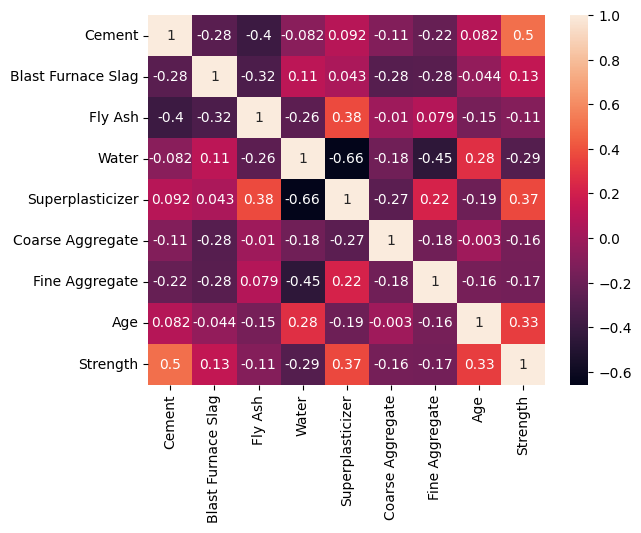

In [21]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(concrete_data.corr(), annot=True)



Three best predictors for strength are Cement, Superplasticizer and Age. The issue is for strength and generally, there are no strong predictors, with no correlations over .5 for strength.

### Question 5: Plot the scatterplot between strength and its strongest correlation.

The plot should be between cement and strength

[]

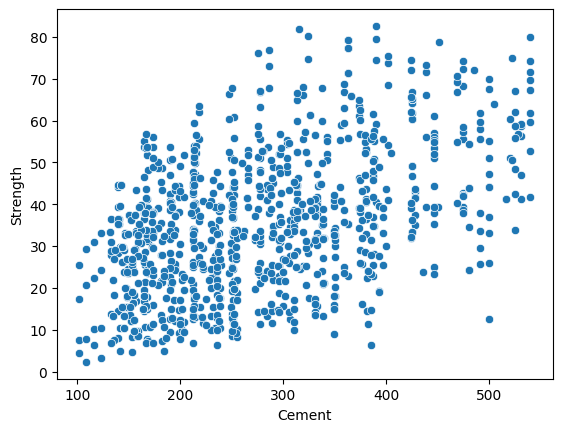

In [23]:
sb.scatterplot(x=concrete_data['Cement'], y=concrete_data['Strength'])
plt.plot()

### Question 6: Describe the relationship between the variables based on the scores and plot

Positive linear correlation with a large variance, with more variance at the higher X values

# 3) Linear Regression

### Question 7: Create Linear Regression Model

1.   Define the features and define the target variable
2.   Do a 80/20 split for training and test set
3.   Build and train a linear regression model
4.   Print the model parameters


1.   Define the features and target variables

In [ ]:
#print(concrete_data.head())
X = concrete_data[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']]
y = concrete_data['Strength']

2. Do a 80/20 split for training and test set with a random state of 42

In [31]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

3. Build and train a linear regression model

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4. Print the model parameters (Slope & Intercept)

In [37]:
print(f'Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Coefficients: [ 0.11792349  0.10652219  0.08834011 -0.12805301  0.28201847  0.02274626
  0.02328446  0.11046164]
Model Intercept: -33.88944410404295


# 4) Model Evaluation and Visualization



### Question 8: Perform prediction and interpret the model performance (RMSE, R-Squared)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

predictions = model.predict(X_test)
r2 = model.score(X_test, y_test)
print(f'R2: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'Root Squared Mean Error: {np.sqrt(mse)}')

R2: 0.6610158027793835
Root Squared Mean Error: 10.620623140872183


### Interpretation
**EXPLAIN HERE**

### Question 9: Plot the residual as a histogram and interpret the shape and spread of it.

<Axes: xlabel='Strength', ylabel='Count'>

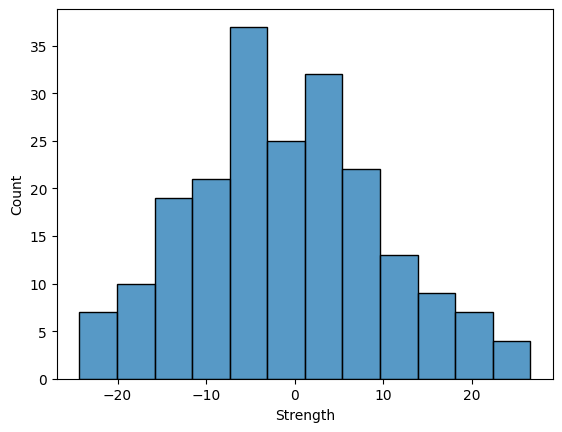

In [47]:
import seaborn as sns

residuals = (predictions-y_test)

sns.histplot(residuals)

### Interpretation:

Residuals are distributed largely normally, with the majority of residuals less than 10 and greater than -15. This is a good indication there are not glaring issues with the model in terms of consistency of the amounts of residuals.